In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
data_df = pd.read_csv('Polynomial_train.csv')


In [5]:
def addcolumns(data_df):
 X2 = data_df['X']*data_df['X']
 Y2 = data_df['Y']*data_df['Y']
 Z2 = data_df['Z']*data_df['Z']
 XY = data_df['X']*data_df['Y']
 XZ = data_df['X']*data_df['Z']
 YZ = data_df['Y']*data_df['Z']
 X3 = data_df['X']*data_df['X']*data_df['X']
 Y3 = data_df['Y']*data_df['Y']*data_df['Y']
 Z3 = data_df['Z']*data_df['Z']*data_df['Z']
 XY2 = data_df['X']*data_df['Y']*data_df['Y']
 XZ2 = data_df['X']*data_df['Z']*data_df['Z']
 XYZ = data_df['X']*data_df['Y']*data_df['Z']
 X2Y = data_df['X']*data_df['X']*data_df['Y']
 X2Z= data_df['X']*data_df['X']*data_df['Z']
 Y2Z= data_df['Y']*data_df['Y']*data_df['Z']
 data_df.insert(loc=4,column='X2',value=X2)
 data_df.insert(loc=5,column='Y2',value=Y2)
 data_df.insert(loc=6,column='Z2',value=Z2)
 data_df.insert(loc=7,column='XY',value=XY)
 data_df.insert(loc=8,column='ZX',value=XZ)
 data_df.insert(loc=9,column='YZ',value=YZ)
 data_df.insert(loc=10,column='X3',value=X3)
 data_df.insert(loc=11,column='Y3',value=Y3)
 data_df.insert(loc=12,column='Z3',value=Z3)
 data_df.insert(loc=13,column='XY2',value=XY2)
 data_df.insert(loc=9,column='XZ2',value=XZ2)
 data_df.insert(loc=14,column='XYZ',value=XYZ)
 data_df.insert(loc=15,column='X2Y',value=X2Y)
 data_df.insert(loc=16,column='X2Z',value=X2Z)
 data_df.insert(loc=17,column='Y2Z',value=Y2Z)
 data_df.rename( columns={'Unnamed: 0':'0'}, inplace=True )
 return(data_df)


In [6]:
data_df = addcolumns(data_df)

data_df.head

<bound method NDFrame.head of            0         X         Y         Z         X2         Y2         Z2  \
0          0  0.643715 -9.866550 -5.836019   0.414369  97.348811  34.059122   
1          1 -1.366446 -3.761945 -8.756162   1.867174  14.152233  76.670372   
2          2 -4.090270 -1.836218 -1.846066  16.730306   3.371695   3.407958   
3          3 -8.730478 -1.923651  3.892972  76.221239   3.700432  15.155232   
4          4  5.367169  0.358357  6.703989  28.806502   0.128419  44.943464   
...      ...       ...       ...       ...        ...        ...        ...   
49995  49995  2.693877 -1.362685 -7.392968   7.256973   1.856911  54.655970   
49996  49996 -9.270188 -5.456920 -2.343480  85.936393  29.777980   5.491899   
49997  49997  6.616753 -2.847288 -0.504040  43.781423   8.107050   0.254056   
49998  49998  3.558199  4.507526 -4.823674  12.660781  20.317790  23.267828   
49999  49999  0.623431  8.863234 -3.231040   0.388666  78.556918  10.439618   

              XY     

In [9]:
x = data_df.drop(['label','0'], axis = 1 ).values
y = (data_df['label'].values).reshape(data_df.shape[0],1)
print(y)
x = np.vstack((np.ones((x.shape[0],)),x.T)).T


[[ 307.9729269 ]
 [ 136.39837542]
 [-310.72481348]
 ...
 [ 663.87365546]
 [-421.00400451]
 [-699.71868166]]


In [10]:
def model(X ,Y, learning_rate , iteration):
    m = Y.size
    theta = np.zeros((X.shape[1],1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        if((i%(iteration/10))==0):
         print("cost is :", cost)
        
    return theta, cost_list  

In [11]:
iteration = 100000
learning_rate = 0.000008
theta,cost_list = model(x,y,learning_rate= learning_rate, iteration= iteration)
print(theta.shape)
print(theta)

cost is : 727060.5592130942
cost is : 40.46229142654367
cost is : 38.18113633477228
cost is : 37.30163901900886
cost is : 36.962098499643886
cost is : 36.830580503260634
cost is : 36.77921991238204
cost is : 36.75876064853734
cost is : 36.750227673987226
cost is : 36.746310647985005
(19, 1)
[[-1.14512535e-01]
 [-1.75157585e+00]
 [-1.46832896e-01]
 [ 1.14789672e-01]
 [ 1.01663130e+00]
 [-5.00450307e+00]
 [ 3.99479708e+00]
 [-3.19974916e+01]
 [-1.40019042e+01]
 [-3.00639435e-04]
 [ 6.99902915e+00]
 [ 2.97119102e-02]
 [-3.20510999e-05]
 [ 1.70024131e-04]
 [-7.56868189e-04]
 [ 4.35183648e-03]
 [-3.78538841e-03]
 [-2.52813785e-05]
 [ 1.04751428e-04]]


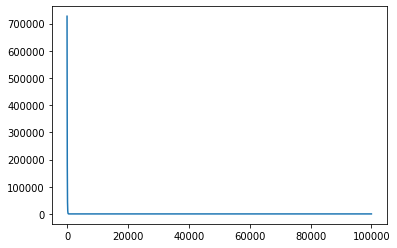

In [12]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [13]:
data2_df = pd.read_csv('Polynomial_test.csv')
data2_df = addcolumns(data2_df)
x1 = data2_df.drop(['label','0'], axis = 1 ).values
y1 = (data2_df['label'].values).reshape(data2_df.shape[0],1)
x1 = np.vstack((np.ones((x1.shape[0],)),x1.T)).T
y_pred = np.dot(x1,theta)
print(y_pred)
print(y1)


[[ -650.15076553]
 [ -550.24598417]
 [  -73.14393422]
 ...
 [-1774.33199569]
 [  -18.53102115]
 [  -61.8486595 ]]
[[ -657.66930949]
 [ -545.36252395]
 [  -75.04418664]
 ...
 [-1771.64069421]
 [  -22.74692118]
 [  -64.85344575]]
3.879090230108349


In [14]:
print( "R2 score = ",1-sum(np.square(y_pred-y1))/sum(np.square(y1-np.mean(y1))))

R2 score =  [0.99998551]
